<a href="https://colab.research.google.com/github/Geetika2282/NLP-AI/blob/main/28_Word2Vec_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install gensim

In [3]:
!pip install gensim

In [4]:
from gensim.models import Word2Vec

In [5]:
sentences = ["The quick brown fox jumps over the lazy dog.",
             "I like eating apples and bananas.",
             "Natural language processing is a fascinating field."]

In [7]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
final_data = []
for sent in sentences:
  final_data.append(word_tokenize(sent))

In [13]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [14]:
model = Word2Vec(final_data, min_count=1,vector_size=10)

In [18]:
model.wv['dog']

array([-0.08619688,  0.03665738,  0.05189884,  0.05741938,  0.07466918,
       -0.06167675,  0.01105614,  0.06047282, -0.0284005 , -0.06173522],
      dtype=float32)

In [21]:
print(model.wv.most_similar('apples'))

[('and', 0.7049788236618042), ('like', 0.5371327996253967), ('eating', 0.5149887204170227), ('field', 0.3046179413795471), ('processing', 0.22772559523582458), ('bananas', 0.189779594540596), ('jumps', 0.1793910264968872), ('is', 0.16099458932876587), ('over', 0.055196743458509445), ('the', 0.017856968566775322)]


In [22]:
model

In [23]:
# total no of words in final_data
len(model.wv.key_to_index)

23

In [25]:
model.wv['apples'] # provides access to the word vectors (embeddings) generated by the model after training

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [26]:
model.wv['bananas']

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [27]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=100

In [31]:
def get_embedding(word):
  try:
    word_embedding = model.wv[word]
    print('Word Embedding for',word,'is: ',word_embedding)
  except:
    print(word,'is not in vocabulary')

In [32]:
get_embedding('cherry')

cherry is not in vocabulary


In [33]:
get_embedding('fox')

Word Embedding for fox is:  [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
cosine_similarity(model.wv['apples'].reshape(1,-1),
                  model.wv['bananas'].reshape(1,-1))

array([[0.18977958]], dtype=float32)

In [36]:
cosine_similarity(model.wv['dog'].reshape(1,-1),
                  model.wv['fox'].reshape(1,-1))

array([[0.2238495]], dtype=float32)

In [37]:
nltk.download('abc')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.


True

##### abc contains random sentences

In [38]:
from nltk.corpus import abc

In [39]:
sents = abc.sents()

In [40]:
len(sents)

29059

In [41]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [42]:
model = Word2Vec(sents, min_count=1, vector_size=10)

In [43]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [44]:
len(model.wv.key_to_index)

31885

In [45]:
model.wv.most_similar('company') # Most similar top 10 words are returned they find cosine similarity between them

[('inquiry', 0.9600245952606201),
 ('group', 0.950490415096283),
 ('report', 0.9500735998153687),
 ('government', 0.9498130679130554),
 ('Dept', 0.9487594366073608),
 ('Government', 0.9480598568916321),
 ('slabs', 0.9463889598846436),
 ('disband', 0.9383321404457092),
 ('research', 0.9363798499107361),
 ('Court', 0.9357261061668396)]

In [46]:
model.wv.most_similar('government')

[('research', 0.9699444770812988),
 ('investigated', 0.9638563394546509),
 ('Anticipation', 0.9576019048690796),
 ('calling', 0.9515855312347412),
 ('company', 0.9498130679130554),
 ('epic', 0.946279764175415),
 ('Court', 0.9399595856666565),
 ('findings', 0.9397698044776917),
 ('group', 0.9393805861473083),
 ('new', 0.9389937520027161)]

In [47]:
model.wv['government']

array([-0.37375146,  0.85309553,  3.1677368 , -0.41701505, -0.3115745 ,
       -1.3596506 ,  0.18894142,  0.16918793, -1.675712  , -0.89491296],
      dtype=float32)

In [48]:
model.wv['company']

array([-0.40960684,  1.471809  ,  4.728314  , -1.9229184 , -0.06384911,
       -1.5967757 ,  0.9504378 , -0.9524911 , -2.9847815 , -1.2291524 ],
      dtype=float32)

In [49]:
cosine_similarity(model.wv['government'].reshape(1,-1),
                  model.wv['company'].reshape(1,-1))[0]

array([0.949813], dtype=float32)

### Read the data and train the Word2Vec

In [50]:
import json

In [67]:
with open('/content/drive/MyDrive/Datasets/intents.json') as f:
  data = json.load(f)

In [68]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [69]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [70]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [71]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [72]:
# coverting data into dataframe
import pandas as pd
df = pd.DataFrame(data)
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [73]:
df['patterns']

,patterns
0,"[Hi, How are you, Is any one to talk?, Hello, ..."
1,"[Bye, See you later, Goodbye, I will come back..."
2,"[Thanks for helping me, Thank your guidance, T..."
3,"[What hours are you open?, Tell your opening t..."
4,"[Can I pay using credit card?, Can I pay usin..."


In [74]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [75]:
# convert the patterns columns list to the string
df['patterns'] = df['patterns'].apply(lambda x: ' '.join(x))

In [76]:
df

,tag,patterns,responses
0,welcome,Hi How are you Is any one to talk? Hello hi ar...,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,Bye See you later Goodbye I will come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,Thanks for helping me Thank your guidance That...,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,What hours are you open? Tell your opening tim...,"[We're open every day 8am-7pm, Our office hour..."
4,payments,Can I pay using credit card? Can I pay using ...,"[We accept VISA, Mastercard and credit card, W..."


In [77]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word
import string
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x.lower() for x in word_tokenize(x)))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x:' '.join(x for x in word_tokenize(x) if x not in stop))
df['patterns'] = df['patterns'].apply(lambda x:' '.join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))

In [79]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [80]:
# create the vocabulary of list of list of words for patterns
vocab = []
for sent in df['patterns']:
  vocab.append(word_tokenize(sent))


In [81]:
vocab

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [82]:
model = Word2Vec(vocab, min_count=1, vector_size=2)

In [83]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [84]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [85]:
model.wv.key_to_index

{'pay': 0,
 'open': 1,
 'use': 2,
 'hi': 3,
 'time': 4,
 'thank': 5,
 'hello': 6,
 'talk': 7,
 'soon': 8,
 'one': 9,
 'bye': 10,
 'see': 11,
 'later': 12,
 'goodbye': 13,
 'come': 14,
 'back': 15,
 'available': 16,
 'cash': 17,
 'help': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hours': 23,
 'tell': 24,
 'please': 25,
 'credit': 26,
 'card': 27,
 'guidance': 28}

In [86]:
import matplotlib.pyplot as plt
import numpy as np

In [87]:
words =list(model.wv.key_to_index.keys())

In [88]:
words

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [89]:
vectors = []
for word in words:
  vect = model.wv[word]
  vectors.append(list(vect))

In [90]:
vectors

[[-0.026513906, 0.01156701],
 [0.25526112, 0.45090607],
 [-0.46515337, -0.35582092],
 [0.32294363, 0.4486494],
 [-0.2507714, -0.18816859],
 [0.36877084, -0.07690762],
 [-0.22683066, 0.32770258],
 [-0.24300802, -0.09080088],
 [0.14380899, 0.049651854],
 [-0.41426075, -0.4724409],
 [0.36533156, 0.25365862],
 [0.3375778, 0.038443603],
 [0.31745085, -0.17025824],
 [-0.047435395, 0.28846955],
 [-0.37631938, -0.19679889],
 [-0.37573153, -0.046566635],
 [0.47690594, -0.36595833],
 [-0.11668843, -0.09688705],
 [0.40388986, -0.29662946],
 [0.0021348884, -0.23767537],
 [-0.48039246, 0.25032294],
 [-0.43807694, -0.21959437],
 [-0.0018065537, -0.014891196],
 [-0.38314208, 0.48097077],
 [0.24910289, 0.46165717],
 [-0.40802845, 0.22491622],
 [-0.20685782, 0.041312076],
 [0.4248581, -0.22306798],
 [0.22575632, -0.33917618]]

In [91]:
vf = pd.DataFrame(vectors,columns=['x','y'],index=words)

In [92]:
vf

,x,y
pay,-0.026514,0.011567
open,0.255261,0.450906
use,-0.465153,-0.355821
hi,0.322944,0.448649
time,-0.250771,-0.188169
thank,0.368771,-0.076908
hello,-0.226831,0.327703
talk,-0.243008,-0.090801
soon,0.143809,0.049652
one,-0.414261,-0.472441


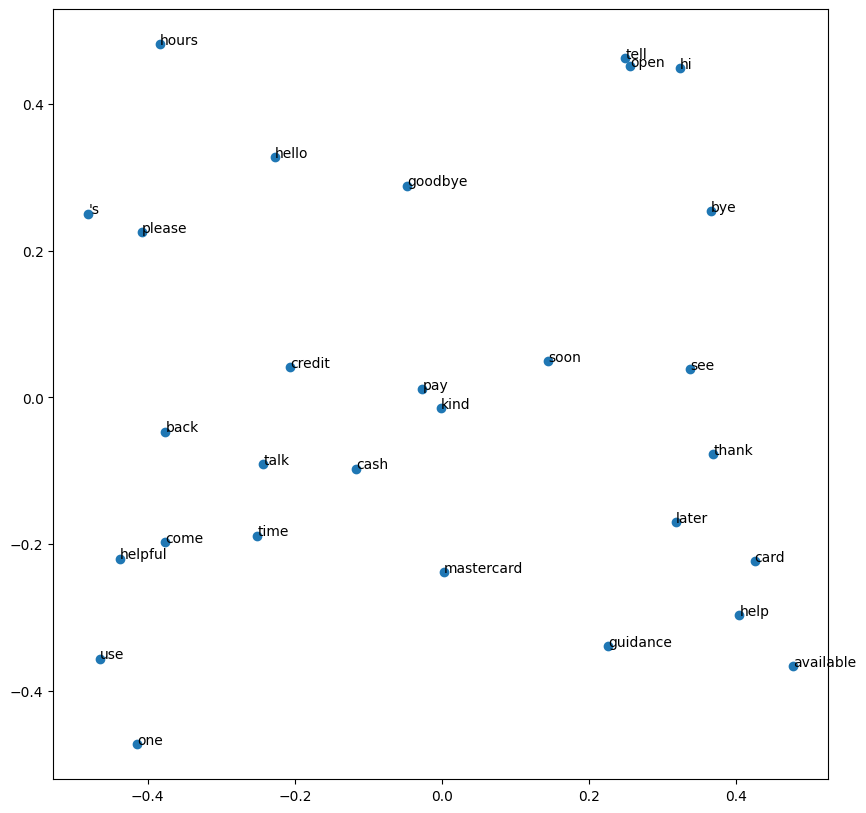

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(vf['x'],vf['y'])
for word,pos in vf.iterrows():
  plt.annotate(word,pos)

plt.show()

In [94]:
# calculating cosine similarity between goodbye and cash, cash and credit
cosine_similarity(model.wv['goodbye'].reshape(1,-1),
                  model.wv['cash'].reshape(1,-1))

array([[-0.50550663]], dtype=float32)

In [95]:
# calculating cosine similarity between cash and credit
cosine_similarity(model.wv['credit'].reshape(1,-1),
                  model.wv['cash'].reshape(1,-1))

array([[0.62935936]], dtype=float32)

In [96]:
model.wv.most_similar('help')

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135),
 ('see', 0.7338290810585022),
 ('mastercard', 0.5991546511650085),
 ('soon', 0.5686679482460022),
 ('kind', 0.4905630648136139),
 ('bye', 0.32444697618484497)]

In [97]:
model.wv.most_similar('help',topn=5)

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135)]

In [98]:
model.wv.doesnt_match(['use','one','come','hello','helpful'])

'hello'

In [99]:
model.wv.words_closer_than('available','soon')

<ipython-input-99-9d629d3f7d54>:1: DeprecationWarning: Call to deprecated `words_closer_than` (Use closer_than instead).
  model.wv.words_closer_than('available','soon')


['thank', 'see', 'later', 'help', 'mastercard', 'card', 'guidance']